# Josh, Nelson, & Zander dataset 
Data obtained from Mitchell J on Kaggle:
https://www.kaggle.com/datasets/datasnaek/league-of-legends

In [2]:
import numpy as np
import pandas as pd
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import mglearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## 1: importing data and splitting
Here we import and trim our data, cleaning out some unused columns and separating the targets from the data points. Then we split into training and test sets.

In [3]:
game_dataset = np.genfromtxt('/cslab/class/cs381/joshschuurman/project_nb/game_data_trimmed_dos.csv', delimiter=',', skip_header=1)

Y = np.array(game_dataset[:, 1]-1)
X = np.array(game_dataset[:, 2:])

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)
print(X_train[0])
print(y_train)

[  1.   0.   0.   0.   0.   0.  12. 133.  51. 105.   5.   0.   0.   0.
   0.   0.  31.  40.   3.  18.   8.  24.  99.  17. 498.  37.   0.   0.
   0.   0.   0. 240.  92. 114.  53.  16.]
[1. 0. 0. ... 1. 1. 1.]


## 2: attempting KNN
First we attempted KNN for simplicity. The accuracy never exceeds 52% no matter the parameters we use.

In [3]:
knn = KNeighborsClassifier(n_neighbors=32)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.51


## 3: Attempting MLP
Next we attempted MLP, which reaches 95-96% accuracy. We tried a few other hidden layer sizes and parameters, but this seemed to be the best set. 500 is a relatively small iteration count, but we didn't find that upping it increased our accuracy. 

In [4]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(128, 64, 32), alpha=0.0001, learning_rate_init=0.001, max_iter=500, random_state=0)
mlp.fit(X_train, y_train)
mlp.predict(X_test)
print("Test set score: {:.2f}".format(mlp.score(X_test, y_test)))

Test set score: 0.95


## 4: Attempting SVC
Here we attempt SVC, which shows similar results to MLP. Nothing significant of note yet.

In [4]:
clf = LinearSVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

y_pred = clf.predict(X_test)
print("Test set score: {:.2f}".format(clf.score(X_test, y_test)))

Test set score: 0.96


## 5: PCA
Since our data contains a very large amount of features, we next attmpted PCA to see if we could reduce it. We used both 21 and 20 component vectors, which is explained in the next block.

In [5]:
pca21 = PCA(n_components=21)
pca20 = PCA(n_components=20)

pca21.fit(X)
pca20.fit(X)
X_pca21 = pca21.transform(X)
X_pca20 = pca20.transform(X)
print("Original shape: {}".format(str(X.shape)))
print("Reduced shape to 21: {}".format(str(X_pca21.shape)))
print("Reduced shape to 20: {}".format(str(X_pca20.shape)))

Original shape: (51490, 36)
Reduced shape to 21: (51490, 21)
Reduced shape to 20: (51490, 20)


## 6: SVC post-PCA
When we were performing SVC post PCA we noticed something interesting: our accuracy is completely consistant at 95-96% accuracy with 21 component vectors, but plummets to random guessing providing around 50% accuracy with 20 components. Furthermore, we noticed that only the 21st component vector was actually contributing any accuracy at all.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_pca21, Y, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Test set score with 21 component vectors: {:.2f}".format(clf.score(X_test, y_test)))

X_train, X_test, y_train, y_test = train_test_split(X_pca20, Y, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Test set score with 20 component vectors: {:.2f}".format(clf.score(X_test, y_test)))

X_pca21_only21 = X_pca21[:, 20:]
X_train, X_test, y_train, y_test = train_test_split(X_pca21_only21, Y, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Test set score with only the 21st component vector from PCA to 21: {:.2f}".format(clf.score(X_test, y_test)))

#look at 21st component and how it compares
#matrix of scatter plots for features pre-pca

Test set score with 21 component vectors: 0.96
Test set score with 20 component vectors: 0.52
Test set score with only the 21st component vector from PCA to 21: 0.96


## 7: Visualization
To try and make sense of our mysterious 21st component vector, we plotted the vectors against eachother on a scatter plot.

In [1]:
df = pd.DataFrame(X_pca21, columns=['1', '2', '3', '4', '5', '6', '7', '8', '9',
                                   '10', '11', '12', '13', '14', '15', '16', '17',
                                   '18', '19', '20', '21'])

NameError: name 'pd' is not defined

In [ ]:
plot = pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (8,8), c=Y)

## 8: Conclusion
So which columns from the original data are important?
To figure this out, we plotted all of the original datapoints against each other in a similar fashion. To spare you from the visual clutter, we just pulled the two features that seemed to be linearly separable: tower kills for each team.

In [7]:
col1 = X[:, 11]
col2 = X[:, 26]
cols = np.column_stack((col1, col2))
df = pd.DataFrame(cols, columns=['Team 1 Tower Kills', 'Team 2 Tower Kills'])

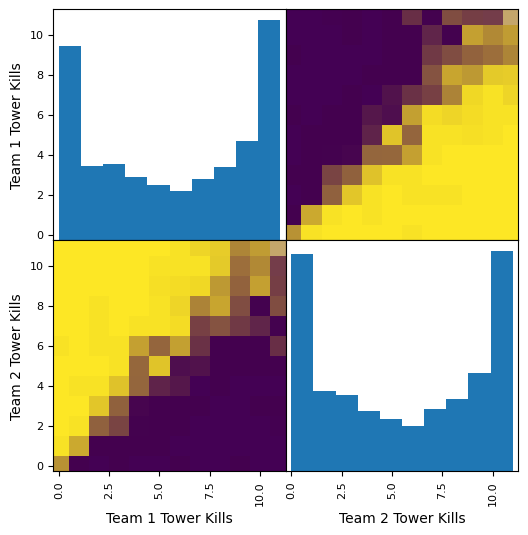

In [8]:
plot = pd.plotting.scatter_matrix(df, alpha=0.2, figsize = (6,6), c=Y, s=210, marker='s')